全部輪廓


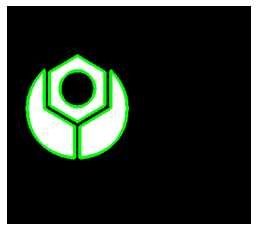

第3群輪廓


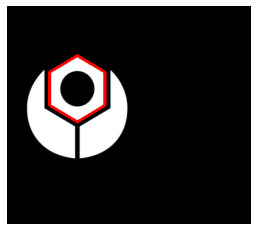

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

filename = 'data/logo.jpg'
img = cv2.imread(filename)
img = cv2.resize(img, (0, 0), fx=0.5, fy=0.5)  # 縮小一倍
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # 轉成灰階影像
ret, thresh = cv2.threshold(imgray, 127, 255, 0)  # 8位元灰階影像二值化，以127為門檻

contours, hierarchy = cv2.findContours(
    thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# 1.輸入的黑白二值影像, 2.建立樹狀輪廓結構, 3.刪去水平與垂直的線，留下轉角點

img2 = img.copy()
cv2.drawContours(img2, contours, -1, (0, 255, 0), 3)
print('全部輪廓'), plt.imshow(img2), plt.axis('off')
plt.show()
img3 = img.copy()
cv2.drawContours(img3, contours, 2, (255, 0, 0), 3)
print('第3群輪廓'), plt.imshow(img3), plt.axis('off')
plt.show()

矩形
矩形長寬比:0.54887


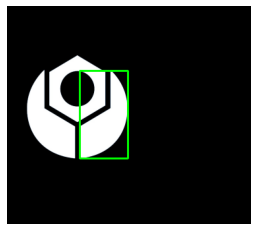

In [26]:
cnt = contours[0]  # 取第一群輪廓 #######
x, y, w, h = cv2.boundingRect(cnt)
img4 = img.copy()
cv2.rectangle(img4, (x, y), (x+w, y+h), (0, 255, 0), 2)
aspect_ratio = float(w)/h
print('矩形')
print('矩形長寬比:'+str(round(aspect_ratio, 5)))
plt.imshow(img4), plt.axis('off')
plt.show()

面積:4551.0
最小矩形


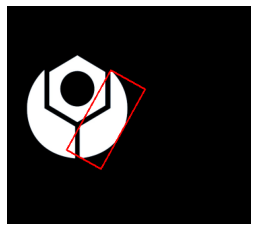

In [27]:
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
img5 = img.copy()
cv2.drawContours(img5, [box], 0, (255, 0, 0), 2)
area = cv2.contourArea(cnt)
print('面積:'+str(area))
print('最小矩形'), plt.imshow(img5), plt.axis('off')
plt.show()

最小圓形


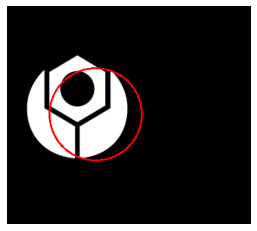

In [28]:
(x, y), radius = cv2.minEnclosingCircle(cnt)
center = (int(x), int(y))
radius = int(radius)
img6 = img.copy()
cv2.circle(img6, center, radius, (255, 0, 0), 2)
print('最小圓形'), plt.imshow(img6), plt.axis('off')
plt.show()

角度: 20.0
橢圓形擬合


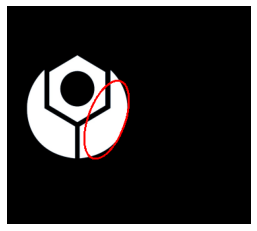

In [29]:
ellipse = cv2.fitEllipse(cnt)
(x, y), (MA, ma), angle = cv2.fitEllipse(cnt)
img7 = img.copy()
cv2.ellipse(img7, ellipse, (255, 0, 0), 2)
print('角度: '+str(round(angle, 2)))
print('橢圓形擬合'), plt.imshow(img7), plt.axis('off')
plt.show()

直線擬合


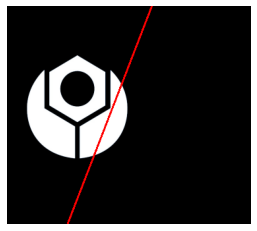

In [14]:
rows, cols = img.shape[:2]
[vx, vy, x, y] = cv2.fitLine(cnt, cv2.DIST_L2, 0, 0.01, 0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
img8 = img.copy()
cv2.line(img8, (cols-1, righty), (0, lefty), (255, 0, 0), 2)
print('直線擬合'), plt.imshow(img8), plt.axis('off')
plt.show()

凸多邊形擬合


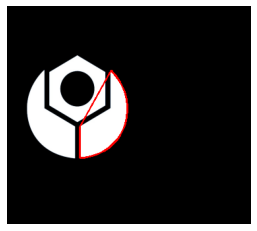

In [15]:
# 建立凸多邊形物件表列
hull = []

# 計算每一組輪廓
for i in range(len(cnt)):
    # 為每一組輪廓建立凸多邊形物件
    hull.append(cv2.convexHull(cnt, False))

img9 = img.copy()
# 繪製凸多邊形外輪廓
for i in range(len(cnt)):
    cv2.drawContours(img9, hull, i, (255, 0, 0), 2)
print('凸多邊形擬合'), plt.imshow(img9), plt.axis('off')
plt.show()

遮罩


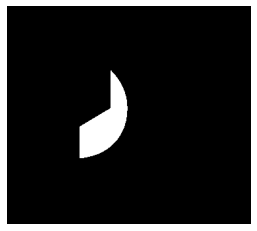

In [30]:
mask = np.zeros(imgray.shape, np.uint8)
cv2.drawContours(mask, [cnt], 0, 255, -1)  # 根據上述凸多邊形(-1)繪製實心輪廓
print('遮罩'), plt.imshow(mask, cmap='gray'), plt.axis('off')
plt.show()